In [1]:
from segment_anything import SamPredictor, SamAutomaticMaskGenerator, sam_model_registry
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
print(sam_model_registry)

{'default': <function build_sam_vit_h at 0x000002D45BE8D300>, 'vit_h': <function build_sam_vit_h at 0x000002D45BE8D300>, 'vit_l': <function build_sam_vit_l at 0x000002D464229080>, 'vit_b': <function build_sam_vit_b at 0x000002D464228EA0>}


In [5]:
model_folder_path = r"C:\Users\patri\Documents\segment_anything_models"
model_file_names = {"vit_h": "sam_vit_h_4b8939.pth",
                    "vit_b": "sam_vit_b_01ec64.pth", 
                    "vit_l": "sam_vit_l_0b3195.pth"}

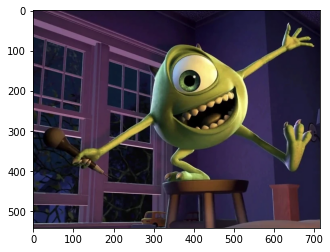

In [28]:
test_img = cv2.imread(r".\sample_imgs\mike.webp")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img);

In [24]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [30]:
model = "vit_b"
sam = sam_model_registry[model](checkpoint=os.path.join(model_folder_path, model_file_names[model]))

In [31]:
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(test_img)

In [33]:
print(masks)

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 1286, 'bbox': [71, 264, 43, 36], 'predicted_iou': 1.0043457746505737, 'point_coords': [[78.203125, 279.46875]], 'stability_score': 0.9861003756523132, 'crop_box': [0, 0, 715, 542]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 1572, 'bbox': [0, 68, 26, 67], 'predicted_iou': 1.0021767616271973,

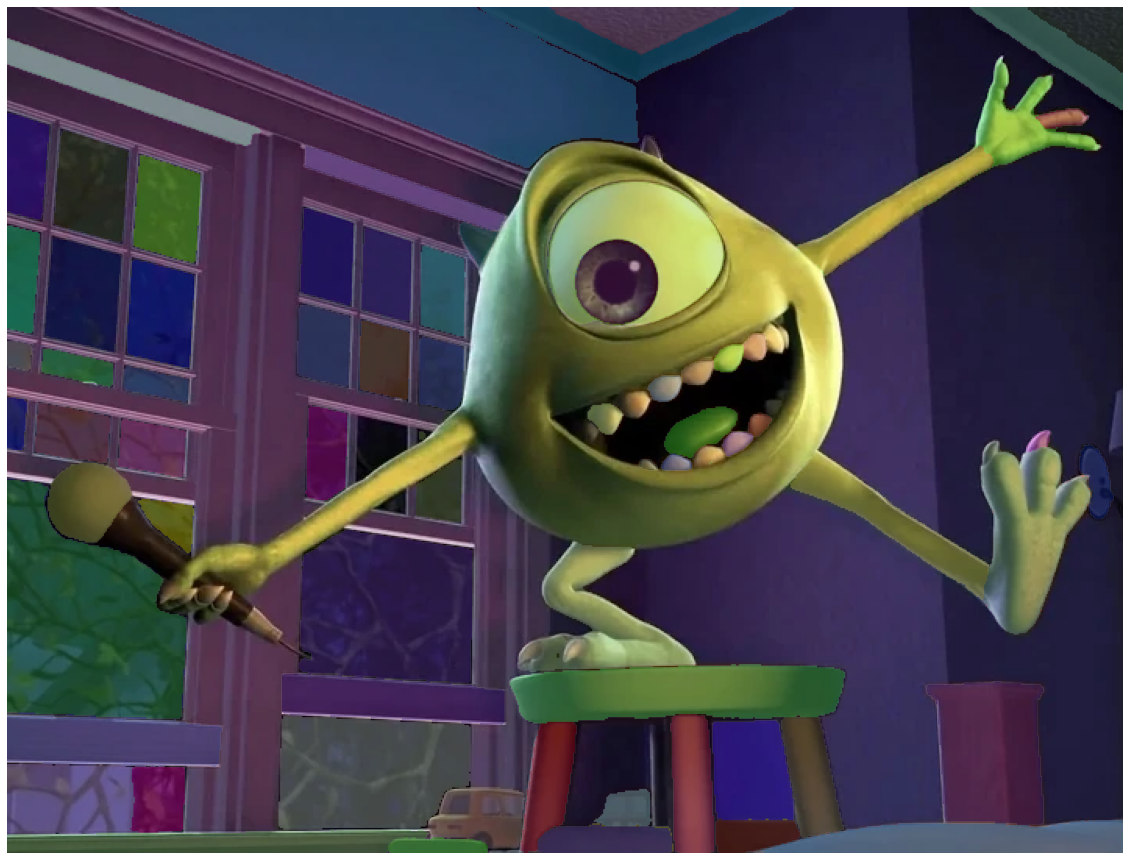

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(test_img)
show_anns(masks)
plt.axis('off')
plt.show()